In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
   h = 1e-4
   grad = np.zeros_like(x)
   
   for idx in range(x.size):
      tmp_val = x[idx]
      
      x[idx] = float(tmp_val) + h
      fxh1 = f(x)
      
      x[idx] = float(tmp_val) - h
      fxh2 = f(x)
      
      grad[idx] = (fxh1 - fxh2) / (2*h)
      
      x[idx] = tmp_val
      
   return grad

def numerical_gradient(f, x):
   if x.ndim == 1:
      return _numerical_gradient_no_batch(f, x)
   else:
      grad = np.zeros_like(x)
      
      for idx, x in enumerate(x):
         grad[idx] = _numerical_gradient_no_batch(f, x)
         
      return grad
   
def function_2(x):
   if x.ndim == 1:
      return np.sum(x**2)
   else:
      return np.sum(x**2, axis=1)   

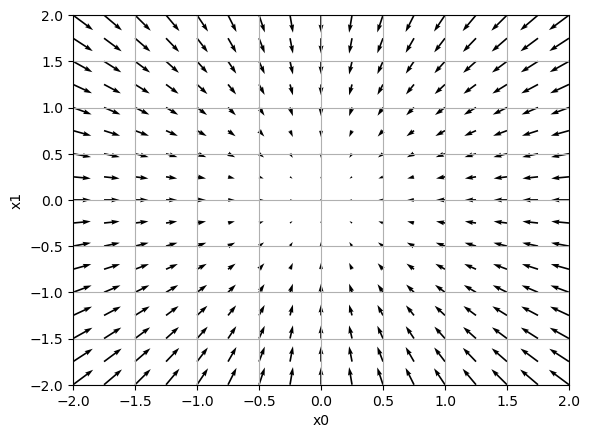

In [2]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()